In [71]:
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import cv2
import pickle
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Anime_dataset_2023_1.csv')

In [3]:
df.head()

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [4]:
df.columns

Index(['Unnamed: 0', 'anime_id', 'Name', 'Score', 'Genres', 'Synopsis', 'Type',
       'Episodes', 'Aired', 'Status', 'Studios', 'Source', 'Duration',
       'Rating', 'Rank', 'Popularity', 'Favorites', 'Members', 'Image URL'],
      dtype='object')

In [5]:
def Q1():
    print("\n  Have you delved into the world of anime before, perhaps? \n")
    ans = input("a. Yes\nb. No\n\nYour answer (a/b): ").strip().lower()

    while ans not in ['a', 'b']:
        print("\nPlease enter a valid option (a/b).")
        ans = input("Your answer (a/b): ").strip().lower()
    if ans == 'a':
        return True
    else:
        return False
        

In [6]:
def Q2():
    print("\n Do you find solace and excitement in the captivating world of anime? \n")
    ans = input("a. Yes\nb. No\n\nYour answer (a/b): ").strip().lower()

    while ans not in ['a', 'b']:
        print("\nPlease enter a valid option (a/b).")
        ans = input("Your answer (a/b): ").strip().lower()
    if ans == 'a':
        print("\n Excellent! Together, let's uncover the anime destined to resonate with your soul \n")
        return True
    else:
        print("Fear not! We shall embark on a quest to discover the ideal anime suited just for you!")
        return False
        

In [7]:
def Q3():
   
    ans = input("\n What anime holds the cherished place in the depths of your heart ? \n ")
    return ans
        

In [8]:
def Q4():
    genres = ['Adventure', 'Action', ' Mystery', ' Sci-Fi', 'Ecchi', 'Fantasy',
              ' Comedy', 'Supernatural', 'Girls Love', 'Sports', 'Romance', ' Horror',
              ' Fantasy', ' Girls Love', 'Hentai', 'Horror', 'Award Winning', 'Erotica',
              ' Adventure', ' Slice of Life', ' Drama', 'Gourmet', ' Romance', 'Sci-Fi',
              'Drama', ' Boys Love', ' Gourmet', 'Boys Love', ' Suspense', ' Award Winning',
              ' Sports', 'Slice of Life', 'UNKNOWN', ' Supernatural', 'Avant Garde', ' Hentai', 
              ' Erotica', 'Suspense', ' Avant Garde', ' Ecchi', 'Comedy', 'Mystery']
    print("\n What genres stir the flames of passion within your soul? \n")
    print("OPTIONS( 'Any for all') : \n\t")

    for i,gen in enumerate(genres,start=1):
        print(f"{i}:{gen}")

    select = input("\n Please enter genres you like (comma-separated):").strip().split(',')

    if 'Any' in select:
        return genres
        
    return select


In [9]:
def Q5():
    rating = ['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai','Any']
    
    print("\n What rating of anime ignites your passion for adventure? \n")
    print("OPTIONS( 'Any for all') : \n\t")

    for i,rat in enumerate(rating,start=1):
        print(f"{i}:{rat}")

    select = input("\n Please enter genres you like (comma-separated):").strip().split(',')
    if 'Any' in select:
        select = rating
    return select
    

In [10]:
def Q6():
    type = ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music','Any']
    
    print("\n  What kind of anime sets your heart ablaze with anticipation? \n")
    print("OPTIONS( 'Any for all') : \n\t")

    for i,typ in enumerate(type,start=1):
        print(f"{i}:{typ}")

    select = input("\n Please enter genres you like (comma-separated):").strip().split(',')
    if 'Any' in select:
        select = type
    return select
    

In [11]:
def intro():
    intro = ''' # Anime Recommendation System

Welcome to our Anime Recommendation System! Are you lost in the vast universe of anime, wondering where to begin or what to watch next? Fear not, as we are here to guide you through the myriad of genres and titles to find the perfect anime that suits your taste.

## Introduction

Kon'nichiwa, fellow anime enthusiast! 🌟

Anime, a form of Japanese animation, has gained immense popularity worldwide for its diverse genres, captivating storytelling, and vibrant characters. With thousands of anime series and movies available, selecting the right one can be a daunting task. Our recommendation system is here to simplify that process for you.

## How It Works

Our recommendation system works by asking you a series of questions about your preferences. Based on your answers, it will analyze your tastes and suggest a list of anime titles tailored to your liking.

## How to Use

To get started, simply answer the questions provided. You can select multiple options for some questions. Once you've completed the questionnaire, our system will generate a list of anime recommendations just for you.

Get ready to embark on an exciting anime journey! '''

    return intro

In [12]:
intro = intro()
md(intro)

 # Anime Recommendation System

Welcome to our Anime Recommendation System! Are you lost in the vast universe of anime, wondering where to begin or what to watch next? Fear not, as we are here to guide you through the myriad of genres and titles to find the perfect anime that suits your taste.

## Introduction

Kon'nichiwa, fellow anime enthusiast! 🌟

Anime, a form of Japanese animation, has gained immense popularity worldwide for its diverse genres, captivating storytelling, and vibrant characters. With thousands of anime series and movies available, selecting the right one can be a daunting task. Our recommendation system is here to simplify that process for you.

## How It Works

Our recommendation system works by asking you a series of questions about your preferences. Based on your answers, it will analyze your tastes and suggest a list of anime titles tailored to your liking.

## How to Use

To get started, simply answer the questions provided. You can select multiple options for some questions. Once you've completed the questionnaire, our system will generate a list of anime recommendations just for you.

Get ready to embark on an exciting anime journey! 

In [13]:
def ask():
    ans = {}
    #Q1 = Q1()
    if(Q1()):
        #yes
       # Q2 = Q2()
        if(Q2()):
            # yes
            ans['fav_anime'] = Q3()
            # anime is selected!!!
        
            #select generes
        ans['fav_gen'] = Q4()
        ans['fav_rat'] = Q5()
        ans['fav_typ'] = Q6()
    else:
        ans['fav_gen'] = Q4()
        ans['fav_rat'] = Q5()
        ans['fav_typ'] = Q6()
    return ans

In [58]:
ans = ask()


  Have you delved into the world of anime before, perhaps? 



a. Yes
b. No

Your answer (a/b):  A



 Do you find solace and excitement in the captivating world of anime? 



a. Yes
b. No

Your answer (a/b):  a



 Excellent! Together, let's uncover the anime destined to resonate with your soul 




 What anime holds the cherished place in the depths of your heart ? 
  Naruto



 What genres stir the flames of passion within your soul? 

OPTIONS( 'Any for all') : 
	
1:Adventure
2:Action
3: Mystery
4: Sci-Fi
5:Ecchi
6:Fantasy
7: Comedy
8:Supernatural
9:Girls Love
10:Sports
11:Romance
12: Horror
13: Fantasy
14: Girls Love
15:Hentai
16:Horror
17:Award Winning
18:Erotica
19: Adventure
20: Slice of Life
21: Drama
22:Gourmet
23: Romance
24:Sci-Fi
25:Drama
26: Boys Love
27: Gourmet
28:Boys Love
29: Suspense
30: Award Winning
31: Sports
32:Slice of Life
33:UNKNOWN
34: Supernatural
35:Avant Garde
36: Hentai
37: Erotica
38:Suspense
39: Avant Garde
40: Ecchi
41:Comedy
42:Mystery



 Please enter genres you like (comma-separated): Ecchi



 What rating of anime ignites your passion for adventure? 

OPTIONS( 'Any for all') : 
	
1:R - 17+ (violence & profanity)
2:PG-13 - Teens 13 or older
3:PG - Children
4:R+ - Mild Nudity
5:G - All Ages
6:Rx - Hentai
7:Any



 Please enter genres you like (comma-separated): Any



  What kind of anime sets your heart ablaze with anticipation? 

OPTIONS( 'Any for all') : 
	
1:TV
2:Movie
3:OVA
4:Special
5:ONA
6:Music
7:Any



 Please enter genres you like (comma-separated): OVA


In [59]:
ans

{'fav_anime': 'Naruto',
 'fav_gen': ['Ecchi'],
 'fav_rat': ['R - 17+ (violence & profanity)',
  'PG-13 - Teens 13 or older',
  'PG - Children',
  'R+ - Mild Nudity',
  'G - All Ages',
  'Rx - Hentai',
  'Any'],
 'fav_typ': ['OVA']}

In [60]:
df[df['Name']==fav_anime]['Genres'].iloc[0].split(',')

['Action', ' Adventure', ' Fantasy']

In [61]:
if 'fav_anime' in ans:
    fav_anime = ans['fav_anime']
    fav_a_gen = df[df['Name']==fav_anime]['Genres'].iloc[0].split(',')
    fav_a_rat = df[df['Name']==fav_anime]['Rating'].iloc[0].split(',')
    fav_a_typ = df[df['Name']==fav_anime]['Type'].iloc[0].split(',')
    
else:
    fav_anime = 1
if 'fav_anime' in ans:
    fav_gen = ans['fav_gen']+fav_a_gen
    fav_rat = ans['fav_rat']+fav_a_rat
    fav_typ = ans['fav_typ']+fav_a_typ
else:
    fav_gen = ans['fav_gen']
    fav_rat = ans['fav_rat']
    fav_typ = ans['fav_typ']

In [64]:
fav_gen

['Ecchi', 'Action', ' Adventure', ' Fantasy']

In [17]:
fav_gen

['Sci-Fi', 'Adventure', 'Romance', 'Action', ' Adventure', ' Fantasy']

In [18]:
fav_anime

'One Piece'

# _______________________________________________________________________________________

In [19]:
x= 'Naruto'

In [20]:
df.iloc[10]

Unnamed: 0                                                   10
anime_id                                                     20
Name                                                     Naruto
Score                                                      7.99
Genres                               Action, Adventure, Fantasy
Synopsis      Moments prior to Naruto Uzumaki's birth, a hug...
Type                                                         TV
Episodes                                                  220.0
Aired                                Oct 3, 2002 to Feb 8, 2007
Status                                          Finished Airing
Studios                                                 Pierrot
Source                                                    Manga
Duration                                          23 min per ep
Rating                                PG-13 - Teens 13 or older
Rank                                                      599.0
Popularity                              

In [21]:
z= df[df['Name']==x]['Genres'].iloc[0].split(',')


In [22]:
ok = ["Comedy"," Adventure", "Slice of Life", "Sports"]

In [23]:
ok


['Comedy', ' Adventure', 'Slice of Life', 'Sports']

In [24]:
z

['Action', ' Adventure', ' Fantasy']

In [25]:
z= df[df['Name']==x]['Genres'].iloc[0].strip().split(',')
ok = ["Comedy"," Adventure", "Slice of Life", "Sports"]
ok=list(set(ok+z))

In [26]:
ok

['Action', ' Adventure', 'Sports', ' Fantasy', 'Comedy', 'Slice of Life']

In [27]:
new = df[df['Genres'].isin(ok)]

In [28]:
new

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
5,5,15,Eyeshield 21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145.0,"Apr 6, 2005 to Mar 19, 2008",Finished Airing,Gallop,Manga,23 min per ep,PG-13 - Teens 13 or older,688.0,1252,1997,177688,https://cdn.myanimelist.net/images/anime/1079/...
12,12,22,Tennis no Ouji-sama,7.86,Sports,"At the request of his father, tennis prodigy R...",TV,178.0,"Oct 10, 2001 to Mar 23, 2005",Finished Airing,Trans Arts,Manga,22 min per ep,PG-13 - Teens 13 or older,805.0,1246,3004,178273,https://cdn.myanimelist.net/images/anime/6/216...
53,53,73,Full Metal Panic! The Second Raid,7.93,Action,"After overcoming various tumultuous events, me...",TV,13.0,"Jul 14, 2005 to Oct 20, 2005",Finished Airing,Kyoto Animation,Light novel,24 min per ep,R - 17+ (violence & profanity),682.0,878,1268,255279,https://cdn.myanimelist.net/images/anime/11/75...
93,93,114,Sakigake!! Cromartie Koukou,7.9,Comedy,Takashi Kamiyama is your typical mild-mannered...,TV,26.0,"Oct 3, 2003 to Mar 26, 2004",Finished Airing,Production I.G,Manga,12 min per ep,PG-13 - Teens 13 or older,722.0,1549,1600,134468,https://cdn.myanimelist.net/images/anime/1782/...
148,148,170,Slam Dunk,8.54,Sports,"Hanamichi Sakuragi, infamous for his temper, m...",TV,101.0,"Oct 16, 1993 to Mar 23, 1996",Finished Airing,Toei Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,108.0,797,6879,283226,https://cdn.myanimelist.net/images/anime/12/86...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24794,24794,55595,Yama no Kamisama,UNKNOWN,Slice of Life,A short film by Touko Yatabe.,Movie,1.0,2012,Finished Airing,UNKNOWN,Original,4 min,G - All Ages,13978.0,24648,0,30,https://cdn.myanimelist.net/images/anime/1790/...
24799,24799,55602,Ohiru no Shocker-san: THE Movie,UNKNOWN,Comedy,No description available for this anime.,Movie,1.0,"Dec 23, 2022",Finished Airing,UNKNOWN,Other,2 hr,PG-13 - Teens 13 or older,0.0,0,0,0,https://cdn.myanimelist.net/images/anime/1125/...
24825,24825,55636,Snack Basue,UNKNOWN,Comedy,No description available for this anime.,UNKNOWN,UNKNOWN,Not available,Not yet aired,UNKNOWN,Manga,Unknown,UNKNOWN,UNKNOWN,18100,0,244,https://cdn.myanimelist.net/images/anime/1739/...
24874,24874,55697,demon slayer,UNKNOWN,Comedy,No description available for this anime.,Special,4.0,Not available,Finished Airing,UNKNOWN,Unknown,20 min per ep,UNKNOWN,0.0,0,0,0,https://cdn.myanimelist.net/img/sp/icon/apple-...


In [29]:
new.nunique()

Unnamed: 0    3763
anime_id      3763
Name          3763
Score          423
Genres           4
Synopsis      3113
Type             7
Episodes       143
Aired         3174
Status           3
Studios        454
Source          17
Duration       235
Rating           7
Rank          3325
Popularity    3538
Favorites      403
Members       2345
Image URL     3739
dtype: int64

In [17]:
df.nunique()

Unnamed: 0    24905
anime_id      24905
Name          24901
Score           567
Genres         1006
Synopsis      20113
Type              7
Episodes        252
Aired         15213
Status            3
Studios        1547
Source           17
Duration        331
Rating            7
Rank          15198
Popularity    18363
Favorites      1814
Members       10996
Image URL     24720
dtype: int64

# __________________________________________________________________________

In [45]:
df.head(1)

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [65]:
fav_gen

['Ecchi', 'Action', ' Adventure', ' Fantasy']

In [66]:
fav_anime

'Naruto'

In [67]:
final_gen= df[df['Name']==fav_anime]['Genres'].iloc[0].strip().split(',')
final_gen=list(set(final_gen+fav_gen))

In [68]:
final_gen

[' Adventure', ' Fantasy', 'Action', 'Ecchi']

In [69]:
def contain_fav_gen(genres):
    return any(genre in genres for genre in final_gen)

gen_df = df[df['Genres'].apply(contain_fav_gen)]

In [70]:
print(df['anime_id'].count(),"\n",gen_df['anime_id'].count())

24905 
 7176


# ------------------------------------------------------------------

In [65]:
df[df['Name']==fav_anime]

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
10,10,20,Naruto,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",Finished Airing,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,599.0,8,76343,2717330,https://cdn.myanimelist.net/images/anime/13/17...


In [67]:
df[df['Name']=='One Piece']

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
11,11,21,One Piece,8.69,"Action, Adventure, Fantasy","Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",Currently Airing,Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,2168904,https://cdn.myanimelist.net/images/anime/6/732...


In [70]:
df[df['Name']=='Dragon Ball Z']

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
734,734,813,Dragon Ball Z,8.16,"Action, Adventure, Comedy, Fantasy",Five years after winning the World Martial Art...,TV,291.0,"Apr 26, 1989 to Jan 31, 1996",Finished Airing,Toei Animation,Manga,24 min per ep,PG-13 - Teens 13 or older,392.0,109,36163,1176423,https://cdn.myanimelist.net/images/anime/1607/...


In [74]:
df['Members'].max()

3744541

In [76]:
df[df['Members']==df['Members'].max()]

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
7428,7428,16498,Shingeki no Kyojin,8.54,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,"Apr 7, 2013 to Sep 29, 2013",Finished Airing,Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),107.0,1,163844,3744541,https://cdn.myanimelist.net/images/anime/10/47...


# ..........................................................................................................---.-.-

In [19]:
final_gen= df[df['Name']==fav_anime]['Genres'].iloc[0].strip().split(',')
final_gen=list(set(final_gen+fav_gen))

def contain_fav_gen(genres):
    return any(genre in genres for genre in final_gen)

gen_df = df[df['Genres'].apply(contain_fav_gen)]

print(df['anime_id'].count(),"\n",gen_df['anime_id'].count())

24905 
 10293


In [20]:
fav_rat

['R - 17+ (violence & profanity)',
 'PG-13 - Teens 13 or older',
 'PG - Children',
 'R+ - Mild Nudity',
 'G - All Ages',
 'Rx - Hentai',
 'Any',
 'PG-13 - Teens 13 or older']

In [21]:
final_rat= df[df['Name']==fav_anime]['Rating'].iloc[0].strip().split(',')
final_rat=list(set(final_rat+fav_rat))

def contain_fav_rat(ratings):
    return any(rating in ratings for rating in final_rat)

rat_df = gen_df[gen_df['Rating'].apply(contain_fav_rat)]

print(gen_df['anime_id'].count(),"\n",rat_df['anime_id'].count())

10293 
 9962


In [22]:
fav_typ

['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Any', 'TV']

In [23]:
final_typ= df[df['Name']==fav_anime]['Type'].iloc[0].strip().split(',')
final_typ=list(set(final_typ+fav_typ))

def contain_fav_typ(Types):
    return any(Type in Types for Type in final_typ)

typ_df = rat_df[gen_df['Type'].apply(contain_fav_typ)]

print(rat_df['anime_id'].count(),"\n",typ_df['anime_id'].count())

9962 
 9954


In [24]:
Final_df = typ_df

In [25]:
Final_df.head()

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...


# *----------------------------___________________________*************************

# peoples with FAv Anime

# *****************************________________________----------------------------------

In [26]:
Final_df.count()

Unnamed: 0    9954
anime_id      9954
Name          9954
Score         9954
Genres        9954
Synopsis      9954
Type          9954
Episodes      9954
Aired         9954
Status        9954
Studios       9954
Source        9954
Duration      9954
Rating        9954
Rank          9954
Popularity    9954
Favorites     9954
Members       9954
Image URL     9954
dtype: int64

In [27]:
Synopsis = Final_df[Final_df['Name']==fav_anime]['Synopsis']

In [28]:
Synopsis

11    Gol D. Roger was known as the "Pirate King," t...
Name: Synopsis, dtype: object

In [29]:
Final_df.columns

Index(['Unnamed: 0', 'anime_id', 'Name', 'Score', 'Genres', 'Synopsis', 'Type',
       'Episodes', 'Aired', 'Status', 'Studios', 'Source', 'Duration',
       'Rating', 'Rank', 'Popularity', 'Favorites', 'Members', 'Image URL'],
      dtype='object')

In [30]:
Final_df['Combined_Feature'] = Final_df.apply(lambda row: f"{row['Score']} {row['Genres']} {row['Synopsis']} {row['Type']} {row['Episodes']} {row['Status']} {row['Studios']} {row['Source']} {row['Duration']} {row['Rating']} {row['Rank']} {row['Popularity']} {row['Favorites']} {row['Members']}", axis=1)

In [31]:
cout_to_recommand_anime = Final_df['anime_id'].count()
cv = CountVectorizer(max_features=1000, stop_words='english')
cv

CountVectorizer(max_features=1000, stop_words='english')

In [32]:
vector = cv.fit_transform(Final_df['Combined_Feature'].values.astype('object')).toarray()

In [33]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
vector.shape

(9954, 1000)

In [35]:
similar = cosine_similarity(vector)

In [36]:
similar

array([[1.        , 0.33641371, 0.28589668, ..., 0.02219484, 0.02526993,
        0.11986583],
       [0.33641371, 1.        , 0.2396975 , ..., 0.0270666 , 0.06163336,
        0.1754116 ],
       [0.28589668, 0.2396975 , 1.        , ..., 0.23002185, 0.23570226,
        0.3229876 ],
       ...,
       [0.02219484, 0.0270666 , 0.23002185, ..., 1.        , 0.84578006,
        0.77151675],
       [0.02526993, 0.06163336, 0.23570226, ..., 0.84578006, 1.        ,
        0.87841046],
       [0.11986583, 0.1754116 , 0.3229876 , ..., 0.77151675, 0.87841046,
        1.        ]])

In [57]:
index = Final_df[Final_df['Name'] == fav_anime].index[0]
dist = sorted(list(enumerate(similar[index])), reverse=True, key=lambda vector: vector[1])

dist

[(0, 1.0000000000000004),
 (6022, 0.4415429902077388),
 (4651, 0.40471360670018985),
 (4511, 0.40233989938361236),
 (64, 0.38682107216634576),
 (2071, 0.3745908466410625),
 (9896, 0.3713906763541037),
 (476, 0.36469840431289857),
 (2486, 0.3635710495157405),
 (9298, 0.3537499729774336),
 (955, 0.35374997297743355),
 (5073, 0.35291594674337773),
 (2973, 0.3528211425363986),
 (9604, 0.3503113654141651),
 (6300, 0.3481787590819721),
 (65, 0.3441664059757127),
 (8151, 0.3438409530367517),
 (7118, 0.34286274066187084),
 (1, 0.33641370682494387),
 (3789, 0.3359355065735124),
 (9147, 0.3359355065735124),
 (7153, 0.33562431103976886),
 (1412, 0.33425160871869336),
 (5749, 0.3329225712138564),
 (8836, 0.3313613782208278),
 (8837, 0.3313613782208278),
 (8838, 0.3313613782208278),
 (3166, 0.3304472761256333),
 (3334, 0.33016664144560465),
 (2568, 0.32951424666022044),
 (7289, 0.32912131438150555),
 (3487, 0.328551406916036),
 (7887, 0.328551406916036),
 (9822, 0.328551406916036),
 (1528, 0.328266

In [38]:
def recommend_Anime(Anime_name):
    try:
        index = Final_df[Final_df['Name'] == Anime_name].index[0]
    except IndexError:
        return "Anime not found in the dataset."
    
    dist = sorted(list(enumerate(similar[index])), reverse=True, key=lambda vector: vector[1])
    
    Recommanded_Animes = pd.DataFrame()
    for i in dist[0:10]:  
        Recommanded_Animes = pd.concat([Recommanded_Animes, Final_df.iloc[[i[0]]]], ignore_index=True)
    
    return Recommanded_Animes

# Example usage
rec = recommend_Anime(fav_anime)

In [39]:
rec.head()

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL,Combined_Feature
0,15,25,Sunabouzu,7.38,"Action, Adventure, Comedy, Sci-Fi, Ecchi","The Great Kanto Desert, a sweltering wasteland...",TV,24.0,"Oct 6, 2004 to Mar 30, 2005",Finished Airing,Gonzo,Manga,24 min per ep,R - 17+ (violence & profanity),2167.0,1546,822,134894,https://cdn.myanimelist.net/images/anime/6/755...,"7.38 Action, Adventure, Comedy, Sci-Fi, Ecchi ..."
1,23239,53111,Dungeon ni Deai wo Motomeru no wa Machigatteir...,8.24,"Action, Adventure, Fantasy",Second part of Dungeon ni Deai wo Motomeru no ...,TV,11.0,"Jan 7, 2023 to Mar 18, 2023",Finished Airing,J.C.Staff,Light novel,24 min per ep,R - 17+ (violence & profanity),302.0,1316,1190,166155,https://cdn.myanimelist.net/images/anime/1226/...,"8.24 Action, Adventure, Fantasy Second part of..."
2,17924,44090,Ling Long: Incarnation Final Chapter,6.94,"Action, Drama, Horror, Sci-Fi, Suspense",Final installment of Ling Long: Incarnation.,ONA,2.0,"May 1, 2021 to May 5, 2021",Finished Airing,YHKT Entertainment,Original,38 min per ep,R - 17+ (violence & profanity),4206.0,11798,8,1331,https://cdn.myanimelist.net/images/anime/1916/...,"6.94 Action, Drama, Horror, Sci-Fi, Suspense F..."
3,2646,2903,Sakigake!! Otokojuku,7.4,"Action, Comedy",Otokojuku: a private school for juvenile delin...,TV,34.0,"Feb 25, 1988 to Nov 14, 1988",Finished Airing,Toei Animation,Manga,24 min per ep,R - 17+ (violence & profanity),2098.0,5331,106,13590,https://cdn.myanimelist.net/images/anime/12/60...,"7.4 Action, Comedy Otokojuku: a private school..."
4,6356,10790,Kore wa Zombie desu ka? of the Dead,7.49,"Action, Comedy, Supernatural, Ecchi",Aikawa Ayumu was revived as a zombie by the cu...,TV,10.0,"Apr 5, 2012 to Jun 7, 2012",Finished Airing,Studio Deen,Light novel,24 min per ep,R - 17+ (violence & profanity),1749.0,583,725,371246,https://cdn.myanimelist.net/images/anime/4/374...,"7.49 Action, Comedy, Supernatural, Ecchi Aikaw..."


In [40]:
Final_df[Final_df['Name']==fav_anime]

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL,Combined_Feature
11,11,21,One Piece,8.69,"Action, Adventure, Fantasy","Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",Currently Airing,Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,2168904,https://cdn.myanimelist.net/images/anime/6/732...,"8.69 Action, Adventure, Fantasy Gol D. Roger w..."


In [41]:
Final_df[Final_df['Name']==fav_anime]

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL,Combined_Feature
11,11,21,One Piece,8.69,"Action, Adventure, Fantasy","Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",Currently Airing,Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,2168904,https://cdn.myanimelist.net/images/anime/6/732...,"8.69 Action, Adventure, Fantasy Gol D. Roger w..."


In [42]:
rec[rec['Name']==fav_anime]

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL,Combined_Feature


In [43]:
test = df

In [44]:
test.head(1)

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL
0,0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...


In [45]:
test['final']=test.apply(lambda row: f"{row['Score']} {row['Genres']} {row['Synopsis']} {row['Type']} {row['Episodes']} {row['Status']} {row['Studios']} {row['Source']} {row['Duration']} {row['Rating']} {row['Rank']} {row['Popularity']} {row['Favorites']} {row['Members']}", axis=1)

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24905 non-null  int64 
 1   anime_id    24905 non-null  int64 
 2   Name        24905 non-null  object
 3   Score       24905 non-null  object
 4   Genres      24905 non-null  object
 5   Synopsis    24905 non-null  object
 6   Type        24905 non-null  object
 7   Episodes    24905 non-null  object
 8   Aired       24905 non-null  object
 9   Status      24905 non-null  object
 10  Studios     24905 non-null  object
 11  Source      24905 non-null  object
 12  Duration    24905 non-null  object
 13  Rating      24905 non-null  object
 14  Rank        24905 non-null  object
 15  Popularity  24905 non-null  int64 
 16  Favorites   24905 non-null  int64 
 17  Members     24905 non-null  int64 
 18  Image URL   24905 non-null  object
 19  final       24905 non-null  object
dtypes: int

In [48]:
test_cv = CountVectorizer(max_features=24905, stop_words='english')

In [49]:
test_vec = test_cv.fit_transform(test['final'].values.astype('object')).toarray()

In [50]:
same = cosine_similarity(test_vec)

MemoryError: Unable to allocate 4.62 GiB for an array with shape (24905, 24905) and data type float64

In [56]:
from scipy.sparse import lil_matrix

def batch_cosine_similar(X,batch_size=1000):
    n_sample = X.shape[0]
    similarity_matrix = lil_matrix((n_sample,n_sample))

    for start in range(0,n_sample,batch_size):
        end = min(start+batch_size,n_sample)
        batch_same = cosine_similarity(X[start:end],X)
        similarity_matrix[start:end] = batch_same

    return similarity_matrix


same = batch_cosine_similar(test_vec,batch_size=1000) 


MemoryError: Unable to allocate 4.62 GiB for an array with shape (24905, 24905) and data type float64

In [55]:
def batch_cosine _similar(X,batch_size=1000):
    n_sample = X.shape[0]
    similarity_matrix = np.zeros((n_sample,n_sample))

    for start in range(0,n_sample,batch_size):
        end = min(start+batch_size,n_sample)
        batch_same = cosine_similarity(X[start:end],X)
        same_matrix[start:end] = batch_same

    return same_matrix


same = batch_cosine_similar(test_vec,batch_size=1000) 

SyntaxError: expected '(' (1835268026.py, line 1)

# __________________________________________________________________________________________

# _________________________________________________________________________________________________________

# FINAL ONE_______________

In [ ]:
ans = ask()

if 'fav_anime' in ans:
    fav_anime = ans['fav_anime']
    fav_a_gen = df[df['Name']==fav_anime]['Genres'].iloc[0].split(',')
    fav_a_rat = df[df['Name']==fav_anime]['Rating'].iloc[0].split(',')
    fav_a_typ = df[df['Name']==fav_anime]['Type'].iloc[0].split(',')
    
else:
    fav_anime = 1
if 'fav_anime' in ans:
    fav_gen = ans['fav_gen']+fav_a_gen
    fav_rat = ans['fav_rat']+fav_a_rat
    fav_typ = ans['fav_typ']+fav_a_typ
else:
    fav_gen = ans['fav_gen']
    fav_rat = ans['fav_rat']
    fav_typ = ans['fav_typ']



In [ ]:
final_gen= df[df['Name']==fav_anime]['Genres'].iloc[0].strip().split(',')
final_gen=list(set(final_gen+fav_gen))

def contain_fav_gen(genres):
    return any(genre in genres for genre in final_gen)

gen_df = df[df['Genres'].apply(contain_fav_gen)]

print(df['anime_id'].count(),"\n",gen_df['anime_id'].count())



# ------------------------------------

final_rat= df[df['Name']==fav_anime]['Rating'].iloc[0].strip().split(',')
final_rat=list(set(final_rat+fav_rat))

def contain_fav_rat(ratings):
    return any(rating in ratings for rating in final_rat)

rat_df = gen_df[gen_df['Rating'].apply(contain_fav_rat)]

print(gen_df['anime_id'].count(),"\n",rat_df['anime_id'].count())

#-------------------------------------------

final_typ= df[df['Name']==fav_anime]['Type'].iloc[0].strip().split(',')
final_typ=list(set(final_typ+fav_typ))

def contain_fav_typ(Types):
    return any(Type in Types for Type in final_typ)

typ_df = rat_df[gen_df['Type'].apply(contain_fav_typ)]

print(rat_df['anime_id'].count(),"\n",typ_df['anime_id'].count())

# ---------------------------------------------
Final_df = typ_df
#------------------------------------------------

Final_df['Combined_Feature'] = Final_df.apply(lambda row: f"{row['Score']} {row['Genres']} {row['Synopsis']} {row['Type']} {row['Episodes']} {row['Status']} {row['Studios']} {row['Source']} {row['Duration']} {row['Rating']} {row['Rank']} {row['Popularity']} {row['Favorites']} {row['Members']}", axis=1)

cout_to_recommand_anime = Final_df['anime_id'].count()
cv = CountVectorizer(max_features=1000, stop_words='english')
cv

vector = cv.fit_transform(Final_df['Combined_Feature'].values.astype('object')).toarray()

similar = cosine_similarity(vector)

index = Final_df[Final_df['Name'] == fav_anime].index[0]
dist = sorted(list(enumerate(similar[index])), reverse=True, key=lambda vector: vector[1])

#----------------------------

def recommend_Anime(Anime_name):
    try:
        index = Final_df[Final_df['Name'] == Anime_name].index[0]
    except IndexError:
        return "Anime not found in the dataset."
    
    dist = sorted(list(enumerate(similar[index])), reverse=True, key=lambda vector: vector[1])
    
    Recommanded_Animes = pd.DataFrame()
    for i in dist[0:10]:  
        Recommanded_Animes = pd.concat([Recommanded_Animes, Final_df.iloc[[i[0]]]], ignore_index=True)
    
    return Recommanded_Animes

# Example usage
rec = recommend_Anime(fav_anime)

In [81]:
Final_df.head(10)

,Unnamed: 0,anime_id,Name,Score,Genres,Synopsis,Type,Episodes,Aired,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Members,Image URL,Combined_Feature
0,0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,1771505,https://cdn.myanimelist.net/images/anime/4/196...,"8.75 Action, Award Winning, Sci-Fi Crime is ti..."
1,1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,360978,https://cdn.myanimelist.net/images/anime/1439/...,"8.38 Action, Sci-Fi Another day, another bount..."
2,2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,727252,https://cdn.myanimelist.net/images/anime/7/203...,"8.22 Action, Adventure, Sci-Fi Vash the Stampe..."
3,3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,111931,https://cdn.myanimelist.net/images/anime/10/19...,"7.25 Action, Drama, Mystery, Supernatural Robi..."
4,4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,15001,https://cdn.myanimelist.net/images/anime/7/215...,"6.94 Adventure, Fantasy, Supernatural It is th..."
6,6,16,Hachimitsu to Clover,8.0,"Comedy, Drama, Romance","Yuuta Takemoto, a sophomore at an arts college...",TV,24.0,"Apr 15, 2005 to Sep 27, 2005",Finished Airing,J.C.Staff,Manga,23 min per ep,PG-13 - Teens 13 or older,589.0,862,4136,260166,https://cdn.myanimelist.net/images/anime/1301/...,"8.0 Comedy, Drama, Romance Yuuta Takemoto, a s..."
8,8,18,Initial D Fourth Stage,8.16,"Action, Drama",Takumi Fujiwara finally joins Ryousuke and Kei...,TV,24.0,"Apr 17, 2004 to Feb 18, 2006",Finished Airing,A.C.G.T.,Manga,27 min per ep,PG-13 - Teens 13 or older,393.0,1273,1237,173710,https://cdn.myanimelist.net/images/anime/9/105...,"8.16 Action, Drama Takumi Fujiwara finally joi..."
10,10,20,Naruto,7.99,"Action, Adventure, Fantasy","Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,"Oct 3, 2002 to Feb 8, 2007",Finished Airing,Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,599.0,8,76343,2717330,https://cdn.myanimelist.net/images/anime/13/17...,"7.99 Action, Adventure, Fantasy Moments prior ..."
11,11,21,One Piece,8.69,"Action, Adventure, Fantasy","Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,"Oct 20, 1999 to ?",Currently Airing,Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,55.0,20,198986,2168904,https://cdn.myanimelist.net/images/anime/6/732...,"8.69 Action, Adventure, Fantasy Gol D. Roger w..."
13,13,23,Ring ni Kakero 1,6.39,"Action, Sports","In order to fulfill their dead father's wish, ...",TV,12.0,"Oct 6, 2004 to Dec 15, 2004",Finished Airing,Toei Animation,Manga,25 min per ep,PG - Children,6943.0,8288,6,4581,https://cdn.myanimelist.net/images/anime/1146/...,"6.39 Action, Sports In order to fulfill their ..."


In [76]:
df['Image URL'][0]

'https://cdn.myanimelist.net/images/anime/4/19644.jpg'

In [77]:
import matplotlib.pylab as plt

img = df['Image URL'][0]
image = plt.imread(img)

plt.imshow(image)
plt.axis('off')
plt.show()

ValueError: Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.

In [78]:
import requests
from io import BytesIO

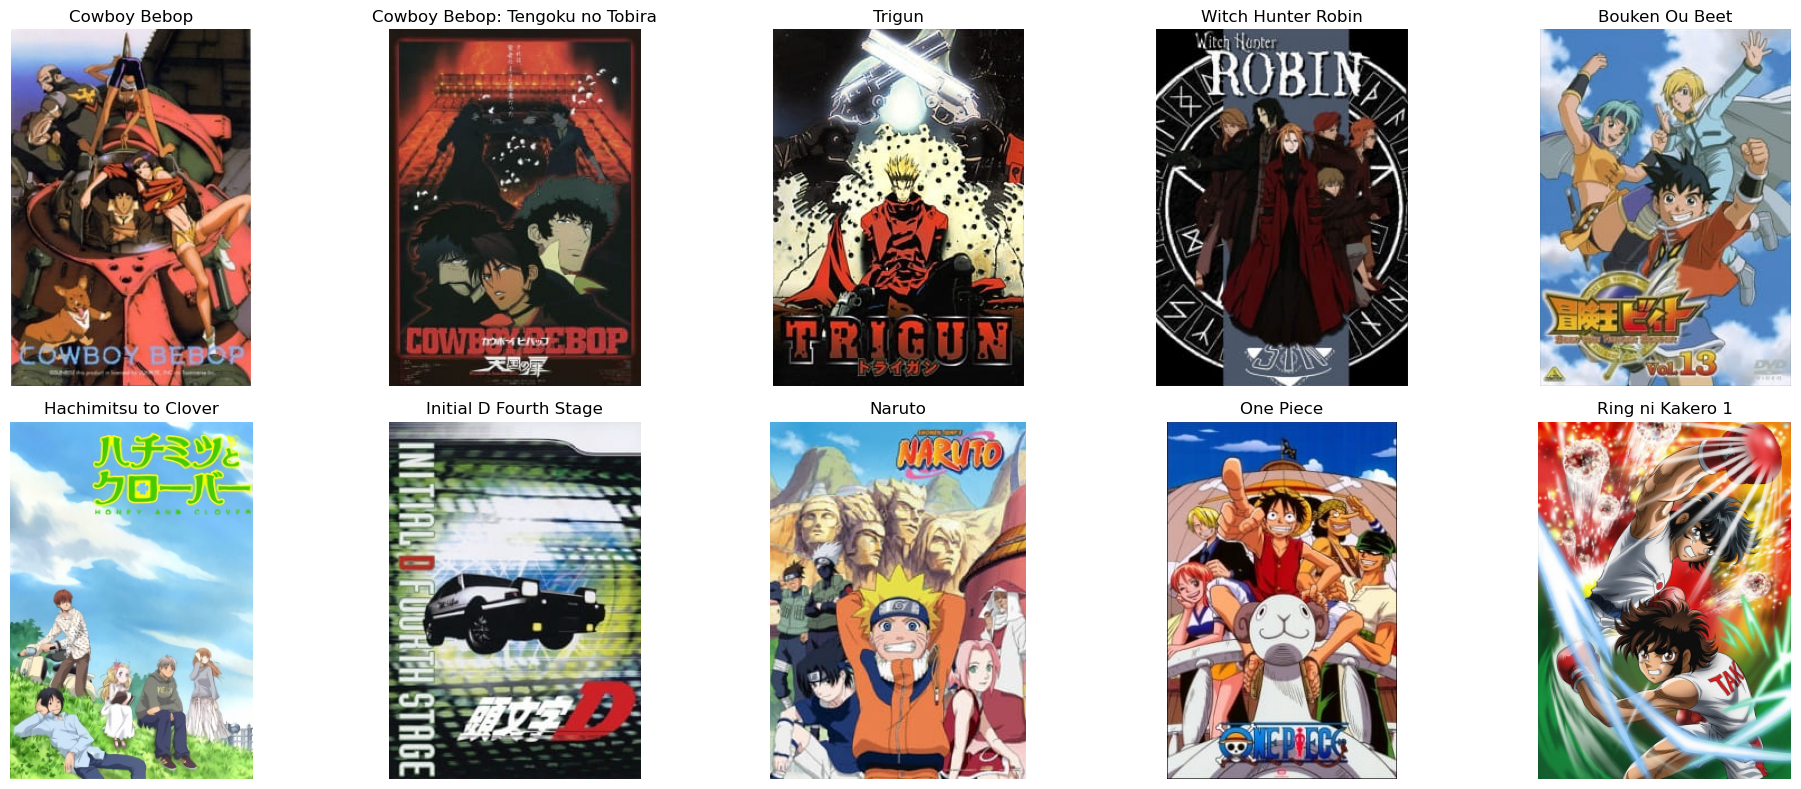

In [83]:
if 'Image URL' in Final_df.columns and 'Name' in df.columns:
    fig, axes =plt.subplots(2,5,figsize=(20,8))
    axes = axes.flatten()

    for i in range(min(10, len(Final_df))):
        img_url = Final_df['Image URL'].iloc[i]
        title = Final_df['Name'].iloc[i]

        response = requests.get(img_url)
        img_data=BytesIO(response.content)

        image = plt.imread(img_data,format='jpg')

        axes[i].imshow(image)
        axes[i].set_title(title)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()